# **2.1. Image**

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set_theme()

(423, 419, 3)


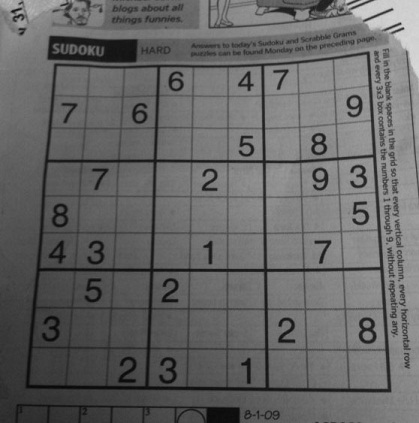

In [ ]:
img = cv2.imread('sudoku-original.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)
cv2_imshow(gray)

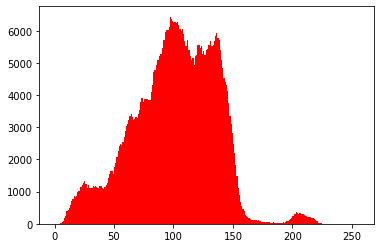

In [ ]:
_ = plt.hist(img.flatten(),256,[0,256], color = 'r')

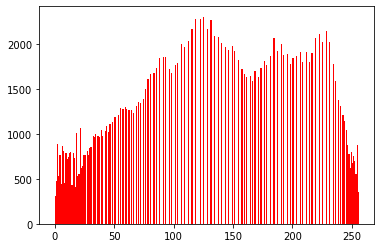

In [ ]:
equ = cv2.equalizeHist(gray)
_ = plt.hist(equ.flatten(),256,[0,256], color = 'r')

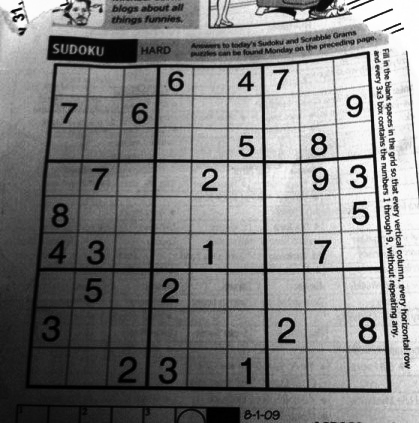

In [ ]:
cv2_imshow(equ)

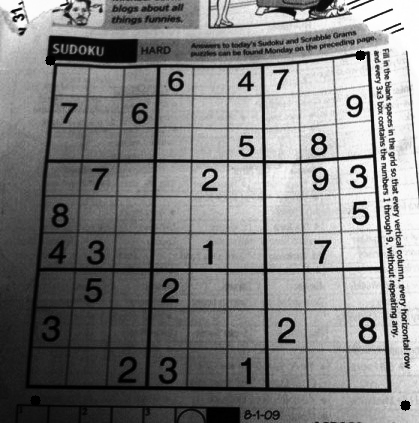

In [ ]:
equ_circle = cv2.circle(equ, (50, 60), 5, (0, 0, 0), -1)
equ_circle = cv2.circle(equ, (360, 55), 5, (0, 0, 0), -1)
equ_circle = cv2.circle(equ, (35, 400), 5, (0, 0, 0), -1)
equ_circle = cv2.circle(equ, (405, 405), 5, (0, 0, 0), -1)
pts1 = np.float32([[50, 60], [360, 55], [35, 400], [405, 405]])

cv2_imshow(equ_circle)

In [ ]:
pts2 = np.float32([[0, 0], [310, 0], [0, 310], [310, 310]])

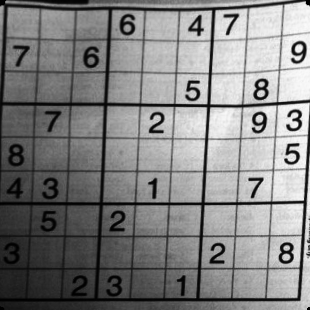

In [ ]:
primary = cv2.getPerspectiveTransform(pts1, pts2)
result = cv2.warpPerspective(equ, primary, (310, 310))
cv2_imshow(result)

# **2.2 Time Series**

In [ ]:
timedata = pd.read_csv ('energydata_complete.csv')
timedata

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Energy Consumption
0,1/11/2016 17:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2000,48.900000,17.033333,45.5300,6.60,733.5,92.000000,7.000000,63.000000,5.3,13.275433
1,1/11/2016 17:10,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2000,48.863333,17.066667,45.5600,6.48,733.6,92.000000,6.666667,59.166667,5.2,18.606195
2,1/11/2016 17:20,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2000,48.730000,17.000000,45.5000,6.37,733.7,92.000000,6.333333,55.333333,5.1,28.642668
3,1/11/2016 17:30,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1000,48.590000,17.000000,45.4000,6.25,733.8,92.000000,6.000000,51.500000,5.0,45.410390
4,1/11/2016 17:40,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1000,48.590000,17.000000,45.4000,6.13,733.9,92.000000,5.666667,47.666667,4.9,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,5/27/2016 17:20,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,24.796667,1.000000,24.500000,44.500000,24.7000,50.074000,23.200000,46.7900,22.70,755.2,55.666667,3.333333,23.666667,13.3,43.096812
19731,5/27/2016 17:30,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,24.196667,1.000000,24.557143,44.414286,24.7000,49.790000,23.200000,46.7900,22.60,755.2,56.000000,3.500000,24.500000,13.3,49.282940
19732,5/27/2016 17:40,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,23.626667,1.000000,24.540000,44.400000,24.7000,49.660000,23.200000,46.7900,22.50,755.2,56.333333,3.666667,25.333333,13.3,29.199117
19733,5/27/2016 17:50,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,22.433333,1.000000,24.500000,44.295714,24.6625,49.518750,23.200000,46.8175,22.30,755.2,56.666667,3.833333,26.166667,13.2,6.322784


In [ ]:
timedata_np = timedata.to_numpy()
print(timedata_np.shape)

(19735, 28)


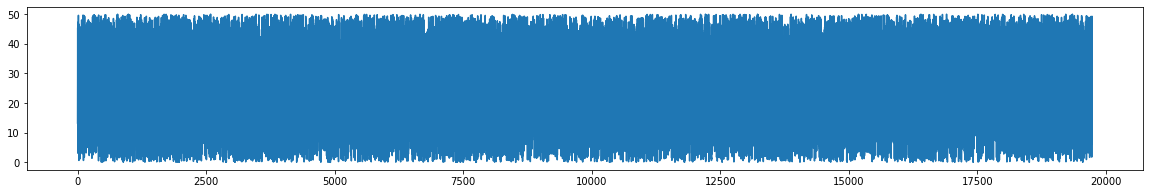

In [ ]:
fig = plt.subplots(figsize=(20, 3))
plt.plot(timedata_np[:,27])
plt.show()

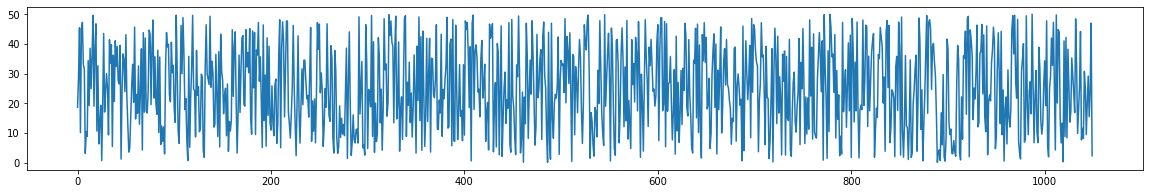

In [ ]:
energy_con_1st_week = timedata_np[1:1051,27]
fig = plt.subplots(figsize=(20, 3))
plt.plot(energy_con_1st_week)

In [ ]:
day_1 = [[sum(timedata_np[7*x:7*x+6,27]) for x in range (i*24+0,i*24+24) ]for i in range (0,7) ] 

day_1 


Text(0.5, 21.5, 'Hours of day')

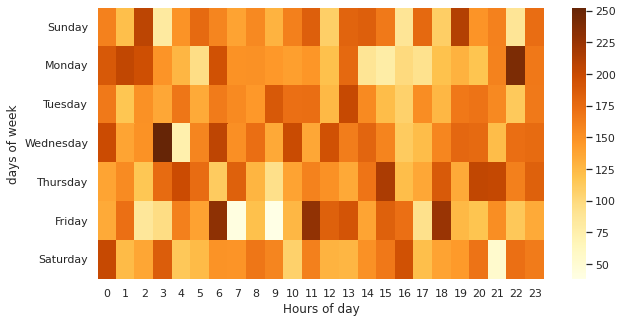

In [ ]:
sns.set_theme()
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.heatmap(day_1, xticklabels=True, cmap = "YlOrBr")

plt.xticks(rotation=0)
plt.yticks(rotation=0)
ax.set_yticklabels(['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday'])



ax.set_ylabel('days of week')
ax.set_xlabel('Hours of day')
